#Weekly Counts of Deaths by State and Select Causes, 2014-2018

Final counts of deaths by the week the deaths occurred, by state of occurrence, and by select causes of death for 2014-2018. The dataset contains 14094 records and 30 columns. 

- In addition to the State and the Week, Week ending date is also provided - this is redundant data and either Week or Week ending date should be dropped.
- Each cause of death column has count columb (integer) and matching "flag" column that has value if the numbers were in a range from 1 to 9 and therefore suppresed.

Death counts in this dataset were derived from the National Vital Statistics System database that provides the most timely access to the data. Therefore, counts may differ slightly from final data due to differences in processing, recoding, and imputation.

Source: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/3yf8-kanr

### I would like to research tendencies for the "Influenza and pneumonia (J10-J18)" cause of death. Possibly see what states at what time of the year have higher numbers.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
hypertable=[]

from scipy.ndimage.filters import gaussian_filter1d

In [2]:
#Database URL
url = 'https://data.cdc.gov/api/views/3yf8-kanr/rows.csv'
#Load the data into a dataframe and display first 5 lines
df = pd.read_csv(url)
df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = pd.read_csv(url)

In [4]:
df1[(df1['Week Ending Date'] == '01/04/2014') & ~(df1['Jurisdiction of Occurrence']=='United States')][['Jurisdiction of Occurrence','Influenza and pneumonia (J10-J18)']]

,Jurisdiction of Occurrence,Influenza and pneumonia (J10-J18)
0,Alabama,NaN
261,Alaska,NaN
522,Arizona,10.0
783,Arkansas,15.0
1044,California,123.0
1305,Colorado,14.0
1566,Connecticut,NaN
1827,Delaware,NaN
2088,District of Columbia,NaN
2349,Florida,39.0


In [5]:
df1.iloc[2]

Jurisdiction of Occurrence                                                                              Alabama
MMWR Year                                                                                                  2014
MMWR Week                                                                                                     3
Week Ending Date                                                                                     01/18/2014
All  Cause                                                                                                 1044
Natural Cause                                                                                               971
Septicemia (A40-A41)                                                                                         21
Malignant neoplasms (C00-C97)                                                                               209
Diabetes mellitus (E10-E14)                                                                             

In [6]:
#Check general information. Dataset shape and overall column descriptions
print('df shape: ', df.shape)
df.describe().T

df shape:  (14094, 30)


,count,mean,std,min,25%,50%,75%,max
MMWR Year,14094.0,2015.992337,1.416950,2014.0,2015.0,2016.0,2017.00,2018.0
MMWR Week,14094.0,26.601533,15.069286,1.0,14.0,27.0,40.00,53.0
All Cause,14094.0,1958.513197,7045.593511,50.0,309.0,780.0,1287.00,67664.0
Natural Cause,14094.0,1794.083156,6456.339032,43.0,276.0,709.0,1182.75,62704.0
Septicemia (A40-A41),7947.0,48.090726,135.598314,0.0,13.0,20.0,32.00,1067.0
Malignant neoplasms (C00-C97),14084.0,425.051122,1527.189508,10.0,63.0,165.0,278.00,12433.0
Diabetes mellitus (E10-E14),10548.0,76.507300,237.803654,0.0,20.0,30.0,48.00,2113.0
Alzheimer disease (G30),11272.0,99.396380,324.017824,0.0,22.0,38.0,62.00,3212.0
Influenza and pneumonia (J10-J18),9088.0,59.098702,189.145124,0.0,14.0,22.0,39.00,2939.0
Chronic lower respiratory diseases (J40-J47),12194.0,126.678940,428.392662,0.0,28.0,49.0,85.00,4382.0


In [7]:
df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All  Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J10-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_otherresp', 'flag_nephr', 'flag_otherunk', 'flag_hd',
       'flag_stroke'],
      dtype='object')

In [8]:
#Rename Columns
#When counts are 1-9 the actual count is suppressed with null value and the corresponding "flag" column gets value describing that.
#I rename the columns to have shorter names
df.columns = ['State', 'Year', 'Week',
       'WeekEndDate', 'All_Cause', 'Nat_Cause',
       'Septicemia', 'Cancer',
       'Diabetes', 'Alzheimer',
       'Influenza_Pneumonia',
       'COPD',
       'Respiratory',
       'Kidney',
       'Other',
       'Heart',
       'Stroke', 'All_Cause_Supressed', 'Nat_Cause_Suppressed',
       'Septicemia_Suppressed', 'Cancer_Supressed', 'Diabetes_Supressed', 'Alzheimer_Supressed', 'Influenza_Pneumonia_Supressed',
       'COPD_Supressed', 'Respiratory_Supressed', 'Kidney_Supressed', 'Other_Supressed', 'Heart_Supressed',
       'Stroke_Supressed']

In [9]:
df.columns
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,Cancer_Supressed,Diabetes_Supressed,Alzheimer_Supressed,Influenza_Pneumonia_Supressed,COPD_Supressed,Respiratory_Supressed,Kidney_Supressed,Other_Supressed,Heart_Supressed,Stroke_Supressed
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#United States data is a combined data for all state
#I Remove United States from the list of states
df=df[~(df['State']=='United States')]
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [11]:
#Convert State names to String datatype
df['State']=df['State'].convert_dtypes()
df['State'].dtype

StringDtype

In [12]:
#Convert WeekEndDate values to date format
df['WeekEndDate']=pd.to_datetime(df['WeekEndDate'])
df['WeekEndDate'].dtypes

dtype('<M8[ns]')

In [13]:
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,Cancer_Supressed,Diabetes_Supressed,Alzheimer_Supressed,Influenza_Pneumonia_Supressed,COPD_Supressed,Respiratory_Supressed,Kidney_Supressed,Other_Supressed,Heart_Supressed,Stroke_Supressed
0,Alabama,2014,1,2014-01-04,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,2014-01-11,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,2014-01-18,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,2014-01-25,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,2014-02-01,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Convert all object data types to strings
df.convert_dtypes()
df.dtypes

State                                    string
Year                                      int64
Week                                      int64
WeekEndDate                      datetime64[ns]
All_Cause                                 int64
Nat_Cause                                 int64
Septicemia                              float64
Cancer                                  float64
Diabetes                                float64
Alzheimer                               float64
Influenza_Pneumonia                     float64
COPD                                    float64
Respiratory                             float64
Kidney                                  float64
Other                                   float64
Heart                                   float64
Stroke                                  float64
All_Cause_Supressed                     float64
Nat_Cause_Suppressed                    float64
Septicemia_Suppressed                    object
Cancer_Supressed                        

In [15]:
df['All_Cause_Supressed'].unique()

array([nan])

In [16]:
df['All_Cause'].isnull().sum()

0

In [17]:
#Since there are no suppressed values for All_Cause death counts, I am dropping the Suppressed column
df.drop(['All_Cause_Supressed'],axis=1, inplace=True)

In [18]:
df['Nat_Cause'].isnull().sum()

0

In [19]:
df['Nat_Cause_Suppressed'].unique()

array([nan])

In [20]:
#Since there are no suppressed values for Nat_Cause death counts, I am dropping the Suppressed column
df.drop(['Nat_Cause_Suppressed'],axis=1, inplace=True)

In [21]:
df['Septicemia'].isnull().sum()

6147

In [22]:
#I'm replacing nulls with zeros and values with 1.
df['Septicemia_Suppressed'].fillna(0,inplace=True)
df['Septicemia_Suppressed'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [23]:
#Since the suppressed null values are those where count is between 1 and 9 I am replacing it with 5 
df['Septicemia'].fillna(5,inplace=True)
df['Septicemia'].isnull().sum()

0

In [24]:
#Repeating the process as above for all remaining columns
df['Cancer'].fillna(5,inplace=True)

In [25]:
df['Cancer_Supressed'].fillna(0,inplace=True)
df['Diabetes_Supressed'].fillna(0,inplace=True)
df['Alzheimer_Supressed'].fillna(0,inplace=True)
df['Influenza_Pneumonia_Supressed'].fillna(0,inplace=True)
df['COPD_Supressed'].fillna(0,inplace=True)
df['Respiratory_Supressed'].fillna(0,inplace=True)
df['Kidney_Supressed'].fillna(0,inplace=True)
df['Other_Supressed'].fillna(0,inplace=True)
df['Heart_Supressed'].fillna(0,inplace=True)
df['Stroke_Supressed'].fillna(0,inplace=True)

df['Cancer_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Diabetes_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Alzheimer_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Influenza_Pneumonia_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['COPD_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Respiratory_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Kidney_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Other_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Heart_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['Stroke_Supressed'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [26]:
df['Diabetes'].fillna(5,inplace=True)
df['Alzheimer'].fillna(5,inplace=True)
df['Influenza_Pneumonia'].fillna(5,inplace=True)
df['COPD'].fillna(5,inplace=True)
df['Respiratory'].fillna(5,inplace=True)
df['Kidney'].fillna(5,inplace=True)
df['Other'].fillna(5,inplace=True)
df['Heart'].fillna(5,inplace=True)
df['Stroke'].fillna(5,inplace=True)

df.isnull().sum()

State                            0
Year                             0
Week                             0
WeekEndDate                      0
All_Cause                        0
Nat_Cause                        0
Septicemia                       0
Cancer                           0
Diabetes                         0
Alzheimer                        0
Influenza_Pneumonia              0
COPD                             0
Respiratory                      0
Kidney                           0
Other                            0
Heart                            0
Stroke                           0
Septicemia_Suppressed            0
Cancer_Supressed                 0
Diabetes_Supressed               0
Alzheimer_Supressed              0
Influenza_Pneumonia_Supressed    0
COPD_Supressed                   0
Respiratory_Supressed            0
Kidney_Supressed                 0
Other_Supressed                  0
Heart_Supressed                  0
Stroke_Supressed                 0
dtype: int64

In [27]:
df.dtypes

State                                    string
Year                                      int64
Week                                      int64
WeekEndDate                      datetime64[ns]
All_Cause                                 int64
Nat_Cause                                 int64
Septicemia                              float64
Cancer                                  float64
Diabetes                                float64
Alzheimer                               float64
Influenza_Pneumonia                     float64
COPD                                    float64
Respiratory                             float64
Kidney                                  float64
Other                                   float64
Heart                                   float64
Stroke                                  float64
Septicemia_Suppressed                     int64
Cancer_Supressed                          int64
Diabetes_Supressed                        int64
Alzheimer_Supressed                     

In [28]:
df.describe().T
#[['min','max']]

,count,mean,std,min,25%,50%,75%,max
Year,13833.0,2015.992337,1.416951,2014.0,2015.0,2016.0,2017.0,2018.0
Week,13833.0,26.601533,15.069296,1.0,14.0,27.0,40.0,53.0
All_Cause,13833.0,1003.082484,996.488974,50.0,301.0,753.0,1242.0,7042.0
Nat_Cause,13833.0,918.958505,917.721545,43.0,271.0,682.0,1144.0,6532.0
Septicemia,13833.0,15.257066,15.865182,0.0,5.0,5.0,22.0,133.0
Cancer,13833.0,217.321839,219.687219,5.0,62.0,161.0,270.0,1302.0
Diabetes,13833.0,30.404106,31.864763,0.0,5.0,23.0,39.0,285.0
Alzheimer,13833.0,41.353792,48.932552,0.0,11.0,29.0,52.0,447.0
Influenza_Pneumonia,13833.0,20.511241,24.312357,0.0,5.0,13.0,27.0,460.0
COPD,13833.0,56.332249,55.905635,0.0,18.0,42.0,73.0,436.0


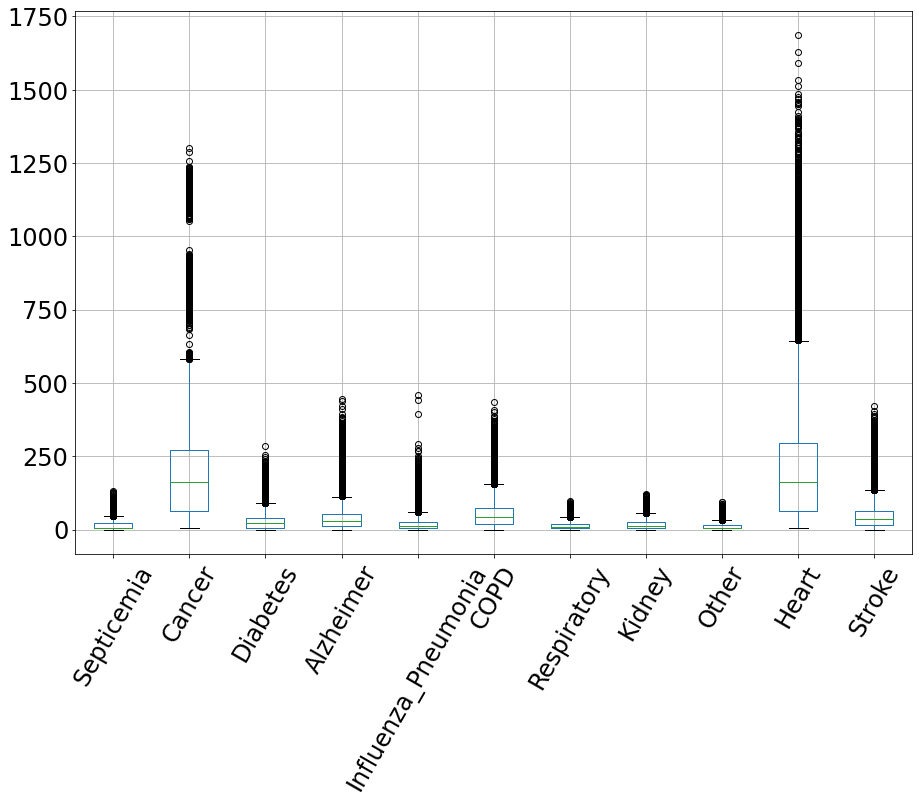

In [29]:
df[['Septicemia', 'Cancer', 'Diabetes', 'Alzheimer', 'Influenza_Pneumonia', 'COPD', 'Respiratory', 'Kidney', 'Other', 'Heart', 'Stroke']]\
.boxplot(rot=60, vert=True, figsize=(15,10), fontsize=24)

In [30]:
#Get Month value from the date and turn it into categorical variables
df['Month']=df['WeekEndDate'].dt.month
df=pd.concat([df, pd.get_dummies(df['Month'])], axis=1)

In [31]:
#season function
def season (wkdate):
    if   wkdate >= datetime.date(wkdate.year,3,20) and wkdate < datetime.date(wkdate.year,6,21):
        return 'Spring'
    elif wkdate >= datetime.date(wkdate.year,6,21) and wkdate < datetime.date(wkdate.year,9,22):
        return 'Summer'
    elif wkdate >= datetime.date(wkdate.year,9,22) and wkdate < datetime.date(wkdate.year,12,21):
        return 'Fall'
    else :
        return 'Winter'

In [32]:
#Create four categorical columns for the seasons
df['Spring'] = 0
df['Summer'] = 0
df['Fall'] = 0
df['Winter'] = 0

df['Winter'] = (df['WeekEndDate'].apply(season) == 'Winter').astype('int32')
df['Spring'] = (df['WeekEndDate'].apply(season) == 'Spring').astype('int32')
df['Summer'] = (df['WeekEndDate'].apply(season) == 'Summer').astype('int32')
df['Fall'] = (df['WeekEndDate'].apply(season) == 'Fall').astype('int32')


In [33]:
df['Season'] = df.apply(lambda x: season(x['WeekEndDate']), axis=1)


In [34]:
df[['Season','Winter','Spring','Summer','Fall']]

,Season,Winter,Spring,Summer,Fall
0,Winter,1,0,0,0
1,Winter,1,0,0,0
2,Winter,1,0,0,0
3,Winter,1,0,0,0
4,Winter,1,0,0,0
...,...,...,...,...,...
13828,Fall,0,0,0,1
13829,Fall,0,0,0,1
13830,Fall,0,0,0,1
13831,Winter,1,0,0,0


In [35]:
#Number of Weeks in each year
noweeks=df.set_index(['State','Year','Week'],drop=False)['Week'].max(level=1).to_dict()
noweeks[2014]

53

In [36]:
#Calculate Next Week function
def nextWeek(year,week):
    try:
        maxweek = noweeks[year-1]
    except:
        maxweek = 52
    if week == 1:
        year -= 1
        week = maxweek
    else:
        week -=1
    return [year,week]
    

In [37]:
#Add next week columns to the dataframe

nextweeks=df.apply(lambda x: nextWeek(x['Year'], x['Week']), axis=1)
tmp=pd.DataFrame.from_dict(dict(zip(nextweeks.index, nextweeks.values))).T
tmp.columns = ['nxtWkYear','nxtWeek']
df=pd.concat([df,tmp],axis=1)


In [38]:
#shift the dataset 
#make sure that states don't overlap

df2=pd.DataFrame(df[['State','nxtWkYear','nxtWeek','Influenza_Pneumonia','Influenza_Pneumonia_Supressed']])
df2.columns = ['State','nxtWkYear','nxtWeek','NextWeekInfluenzaPneumonia','NextWeekInfluenzaPneumoniaSuppressed']
df=df.merge(df2,left_on=['State','Year','Week'],right_on=['State','nxtWkYear','nxtWeek']).drop(['nxtWkYear_x','nxtWeek_x','nxtWkYear_y','nxtWeek_y'],axis=1)




In [39]:
#Check the results to demonstrate that the new column has the next week data
df[['State', 'Year', 'Week','Influenza_Pneumonia','NextWeekInfluenzaPneumonia']][df['State']=='Pennsylvania']


,State,Year,Week,Influenza_Pneumonia,NextWeekInfluenzaPneumonia
10140,Pennsylvania,2014,1,33.0,65.0
10141,Pennsylvania,2014,2,65.0,63.0
10142,Pennsylvania,2014,3,63.0,73.0
10143,Pennsylvania,2014,4,73.0,71.0
10144,Pennsylvania,2014,5,71.0,84.0
...,...,...,...,...,...
10395,Pennsylvania,2018,47,49.0,66.0
10396,Pennsylvania,2018,48,66.0,51.0
10397,Pennsylvania,2018,49,51.0,46.0
10398,Pennsylvania,2018,50,46.0,51.0


In [40]:
#Since the last week of 2018 can't have "the next week"data drop last week of 2018 for all states
maxWeek = df['Week'][df['Year']==2018].max()
df=df[~((df['Year']==2018)&(df['Week']==maxWeek))]

In [41]:
#Create dummy variables for state. Add the dummies back to the dataframe.
df = pd.concat([df, pd.get_dummies(df['State'])], axis=1)

In [42]:
df.columns.values

array(['State', 'Year', 'Week', 'WeekEndDate', 'All_Cause', 'Nat_Cause',
       'Septicemia', 'Cancer', 'Diabetes', 'Alzheimer',
       'Influenza_Pneumonia', 'COPD', 'Respiratory', 'Kidney', 'Other',
       'Heart', 'Stroke', 'Septicemia_Suppressed', 'Cancer_Supressed',
       'Diabetes_Supressed', 'Alzheimer_Supressed',
       'Influenza_Pneumonia_Supressed', 'COPD_Supressed',
       'Respiratory_Supressed', 'Kidney_Supressed', 'Other_Supressed',
       'Heart_Supressed', 'Stroke_Supressed', 'Month', 1, 2, 3, 4, 5, 6,
       7, 8, 9, 10, 11, 12, 'Spring', 'Summer', 'Fall', 'Winter',
       'Season', 'NextWeekInfluenzaPneumonia',
       'NextWeekInfluenzaPneumoniaSuppressed', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       '

In [43]:
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,2014,1,2014-01-04,355,327,5.0,60.0,5.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,2014,2,2014-01-11,872,792,23.0,163.0,23.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,2014,3,2014-01-18,1044,971,21.0,209.0,34.0,31.0,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,2014,4,2014-01-25,1022,967,25.0,205.0,23.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,Alabama,2014,5,2014-02-01,1040,953,18.0,200.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df[(df['Week']==1)&(df['Year']==2014)]['All_Cause'].sum()

31196

In [45]:
df[(df['Week']==2)&(df['Year']==2014)]['All_Cause'].sum()

56285

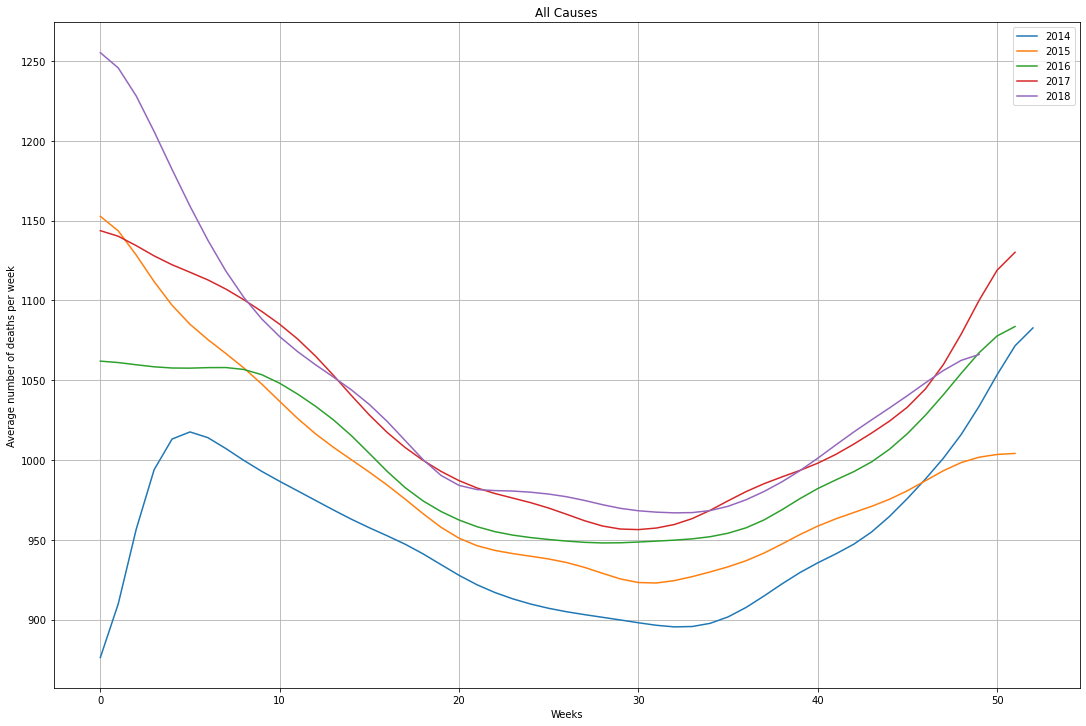

In [46]:
#Plot Predicted numbers for All_Cause weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
plt.title('All Causes')

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ysmoothed = gaussian_filter1d(df_year.groupby(['Week'])['All_Cause'].mean(), sigma=2)
    ax.plot(ysmoothed, label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Average number of deaths per week')
plt.rc('font', size=24)
plt.show()

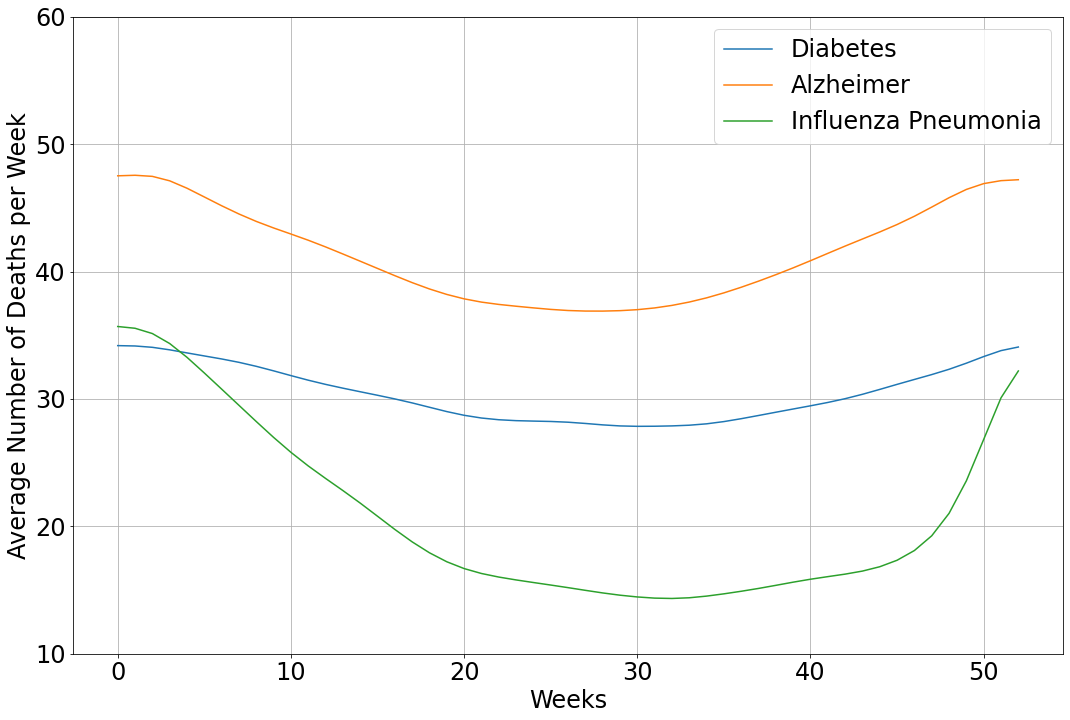

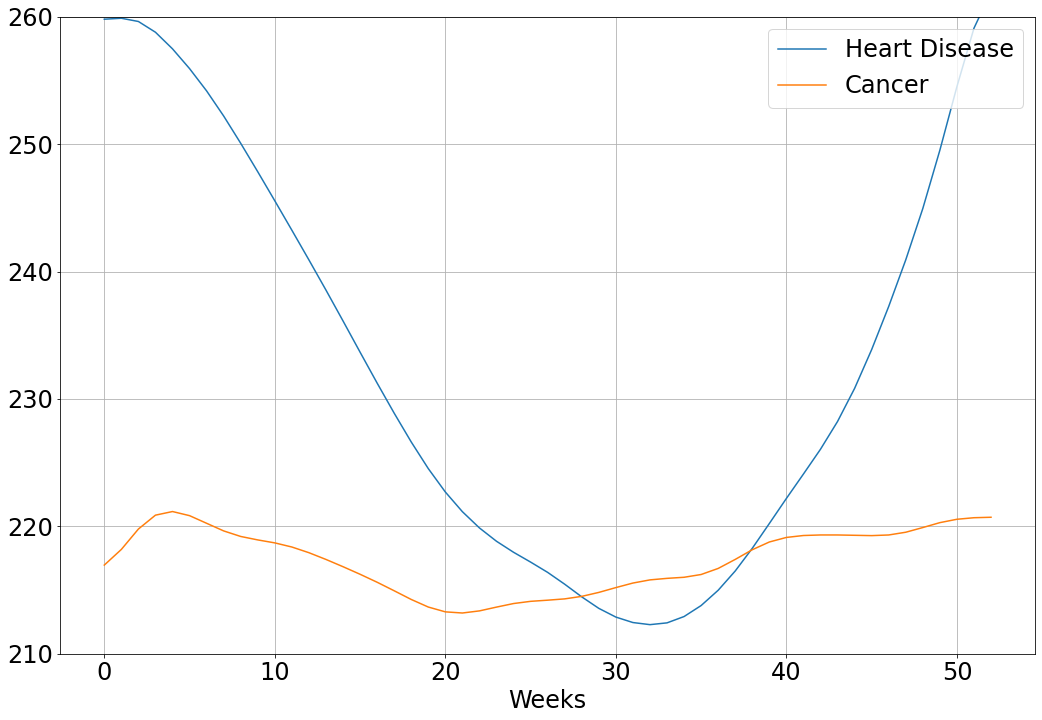

In [47]:
#Plot Predicted numbers for All_Cause weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
#plt.title('Five Years Average Comparison')

def drawplot (feature='',label=''):
    ysmoothed = gaussian_filter1d(df.groupby(['Week'])[feature].mean(), sigma=2)
    ax.plot(ysmoothed,label=label)
    
drawplot(feature='Diabetes', label='Diabetes')
drawplot(feature='Alzheimer', label='Alzheimer')
drawplot(feature='Influenza_Pneumonia', label='Influenza Pneumonia')

fig.tight_layout()
plt.grid('on')
plt.legend(fontsize=24)
plt.xlabel('Weeks')
plt.ylabel('Average Number of Deaths per Week')
plt.ylim(10,60)
plt.rc('font', size=24)
plt.show()

fig, ax = plt.subplots(figsize=(15,10))
plt.axes
#plt.title('Five Years Average Comparison')

drawplot(feature='Heart', label='Heart Disease')
drawplot(feature='Cancer', label='Cancer')

fig.tight_layout()
plt.grid('on')
plt.legend(loc='upper right', fontsize=24)
plt.xlabel('Weeks')
#plt.ylabel('Average Number of Deaths per Week')
plt.ylim(210,260)
plt.rc('font', size=24)
plt.show()


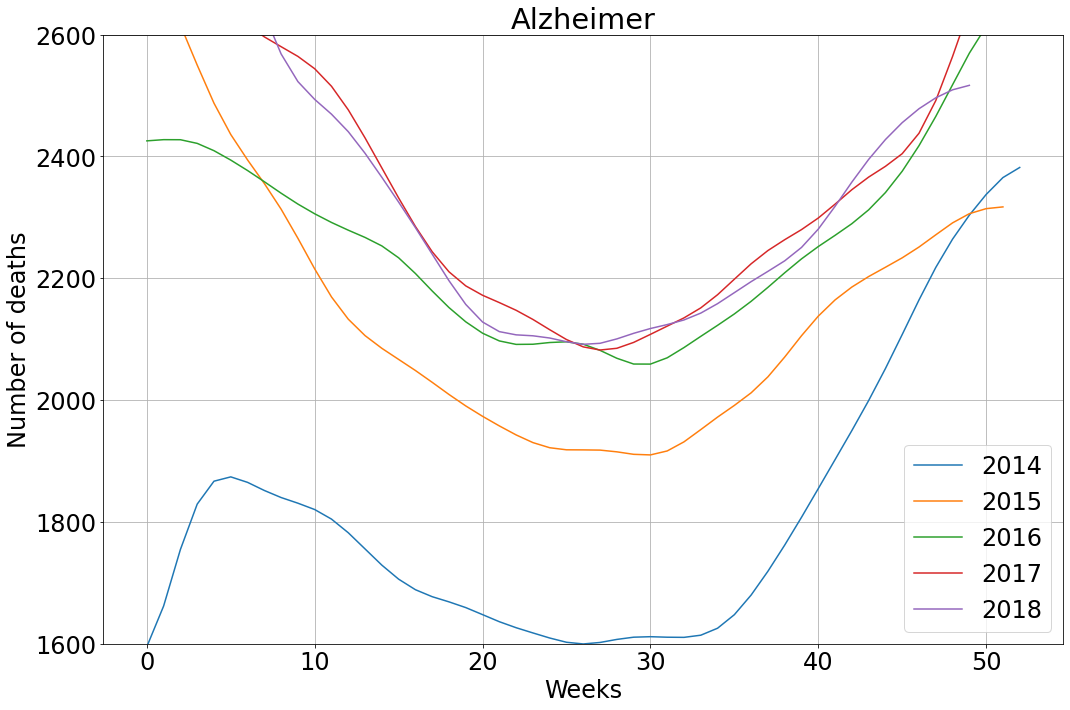

In [48]:
#Plot Predicted numbers for Alzheimer weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
plt.title('Alzheimer')

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ysmoothed = gaussian_filter1d(df_year.groupby(['Week'])['Alzheimer'].sum(), sigma=2)
    ax.plot(ysmoothed,label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.ylim(1600, 2600)
plt.rc('font', size=18)
plt.show()

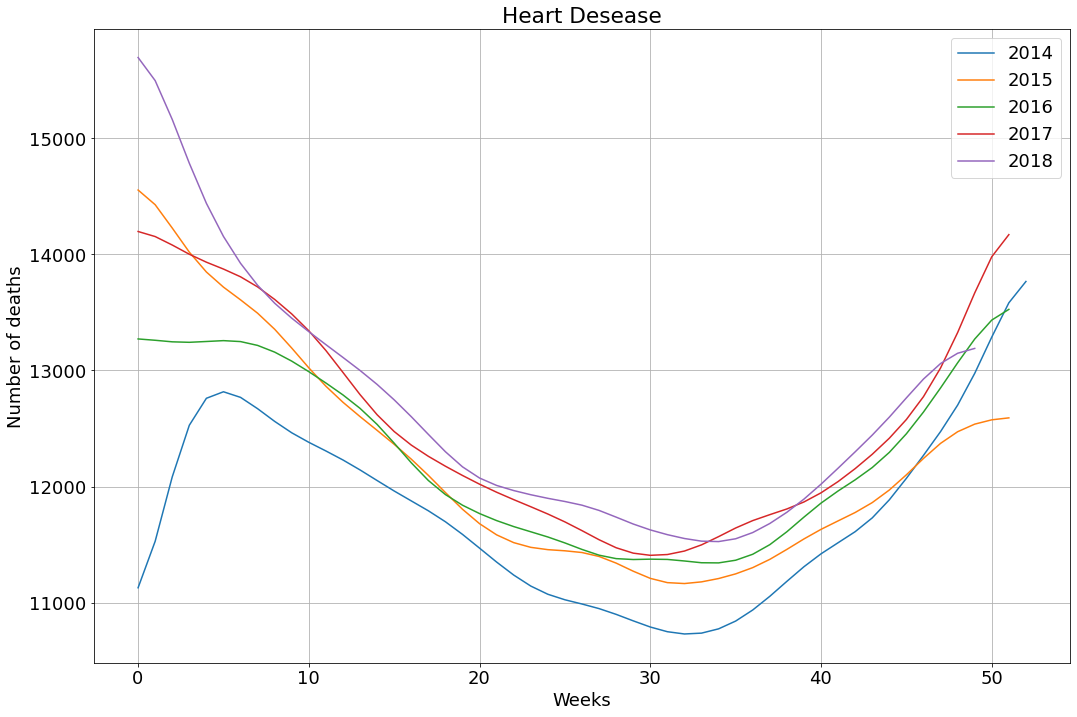

In [49]:
#Plot Predicted numbers for Heart Desease weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
plt.title('Heart Desease')

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ysmoothed = gaussian_filter1d(df_year.groupby(['Week'])['Heart'].sum(), sigma=2)
    ax.plot(ysmoothed,label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.rc('font', size=18)
plt.show()

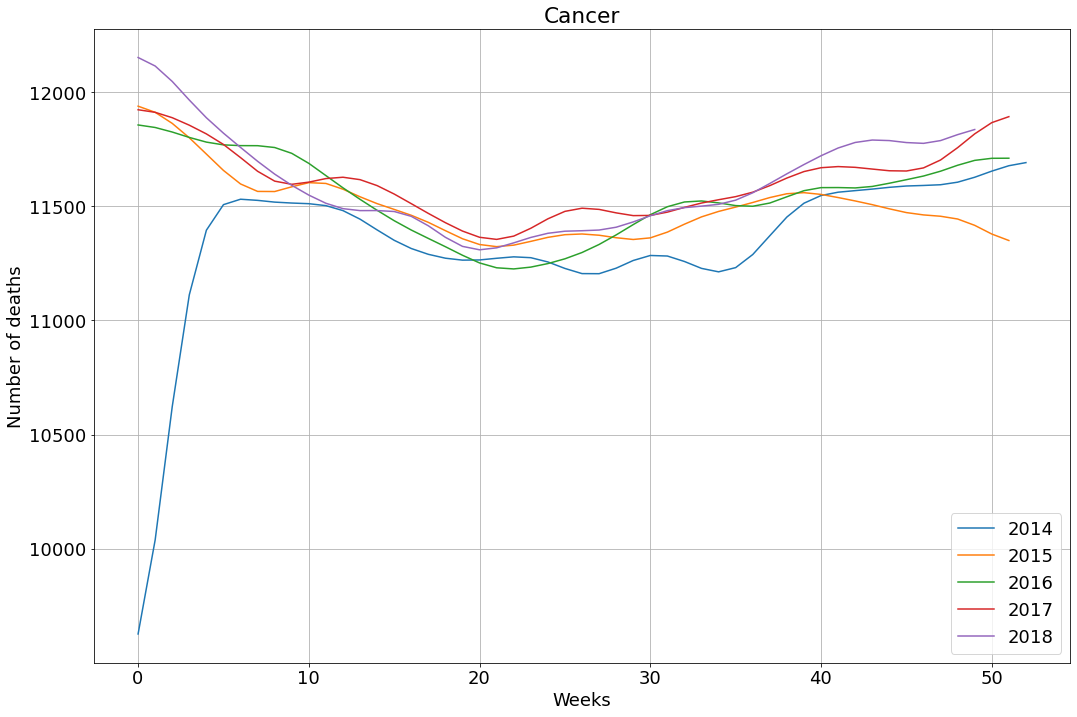

In [50]:
#Plot Predicted numbers for Cancer weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
plt.title('Cancer')

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ysmoothed = gaussian_filter1d(df_year.groupby(['Week'])['Cancer'].sum(), sigma=2)
    ax.plot(ysmoothed,label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.rc('font', size=18)
plt.show()

In [51]:
#Weekly death rates from cancer in PA for 2018 - appears to be quite steady weekly number
df[(df['Year']==2018)&(df['State']=='Pennsylvania')][['Week','Cancer']]

,Week,Cancer
10349,1,525.0
10350,2,565.0
10351,3,555.0
10352,4,578.0
10353,5,526.0
10354,6,542.0
10355,7,559.0
10356,8,553.0
10357,9,587.0
10358,10,550.0


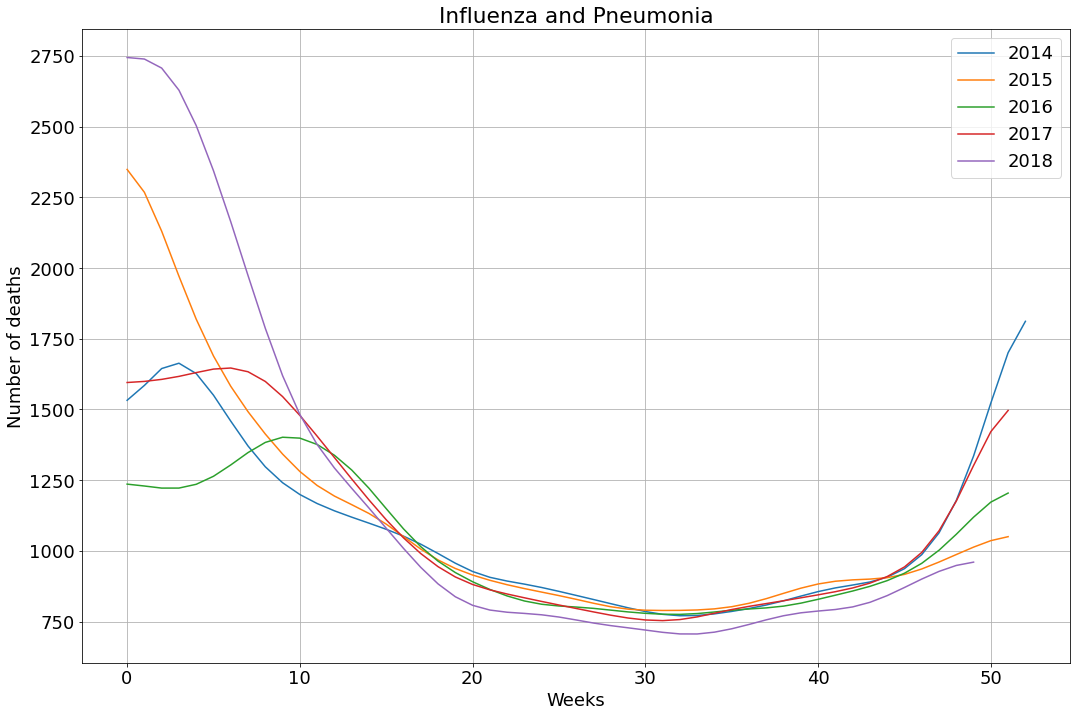

In [52]:
#Plot Predicted numbers for Influenza/Pneumonia weekly death rates 
fig, ax = plt.subplots(figsize=(15,10))
plt.axes
plt.title('Influenza and Pneumonia')

for year in df['Year'].unique():
    df_year=df[(df['Year']==year)]
    ysmoothed = gaussian_filter1d(df_year.groupby(['Week'])['Influenza_Pneumonia'].sum(), sigma=2)
    ax.plot(ysmoothed,label=year)
    

fig.tight_layout()
plt.grid('on')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.rc('font', size=18)
plt.show()

In [53]:
#List of years in the dataset
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [54]:
#Set the 2018 data as test and the rest of the data as train

y_train=df[~(df['Year']==2018)]['NextWeekInfluenzaPneumonia']  
X_train=df[~(df['Year']==2018)].drop(['NextWeekInfluenzaPneumonia','State','Month'], axis=1)
y_test=df[df['Year']==2018]['NextWeekInfluenzaPneumonia'] 
X_test=df[df['Year']==2018].drop(['NextWeekInfluenzaPneumonia','State','Month'], axis=1) 

In [55]:
def metrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None, \
            x_feature=None, x_label=''):
    
    hypertablerow={}
    hypertablerow['model']=model.__class__.__name__
    hypertablerow['features']=features
    hypertablerow['dropped isna columns']=True

    X_train_temp = X_train[features]
    X_test_temp = X_test[features]    
    model.fit(X_train_temp,y_train)
    
    y_pred_test = model.predict(X_test_temp)
    y_pred_train = model.predict(X_train_temp)


    hypertablerow['std_test'] = (y_true_test-y_pred_test).std()
    print('std_test', hypertablerow['std_test'])
    hypertablerow['std_train'] = (y_true_train - y_pred_train).std()
    print('std_train', hypertablerow['std_train'])
    hypertablerow['RMSE_test'] = math.sqrt(mean_squared_error(y_true=y_true_test, y_pred=y_pred_test))
    print('RMSE_test', hypertablerow['RMSE_test'])
    hypertablerow['RMSE_train']= math.sqrt(mean_squared_error(y_true=y_true_train, y_pred=y_pred_train))
    print('RMSE_train', hypertablerow['RMSE_train'])
    hypertablerow['training_score'] = model.score(X=X_train_temp, y=y_pred_train)
    print('training_score', hypertablerow['training_score'])
    hypertablerow['test_score'] = model.score(X=X_test_temp, y=y_pred_test)
    print('test_score', hypertablerow['test_score'])
    hypertable.append(hypertablerow)
    pd.Series(hypertablerow)
        
    plt.figure(figsize=(15,10))
    #plt.scatter(model.predict(X_test[features]), y_test)
    #plt.scatter(model.predict(X_test[features]), model.predict(X_test[features])-y_test)
    #plt.scatter(y_test, model.predict(X_test[features])-y_test)
    plt.scatter(X_test[x_feature], y_pred_test-y_test)
    fig.tight_layout()
    plt.grid('on')
    plt.xlabel(x_feature)
    plt.ylabel('Residual')
    plt.rc('font', size=20)
    plt.show()
    
    return hypertablerow
    

std_test 26.95752101173027
std_train 22.609005475457778
RMSE_test 27.02235606225712
RMSE_train 22.607984914124952
training_score 1.0
test_score 1.0


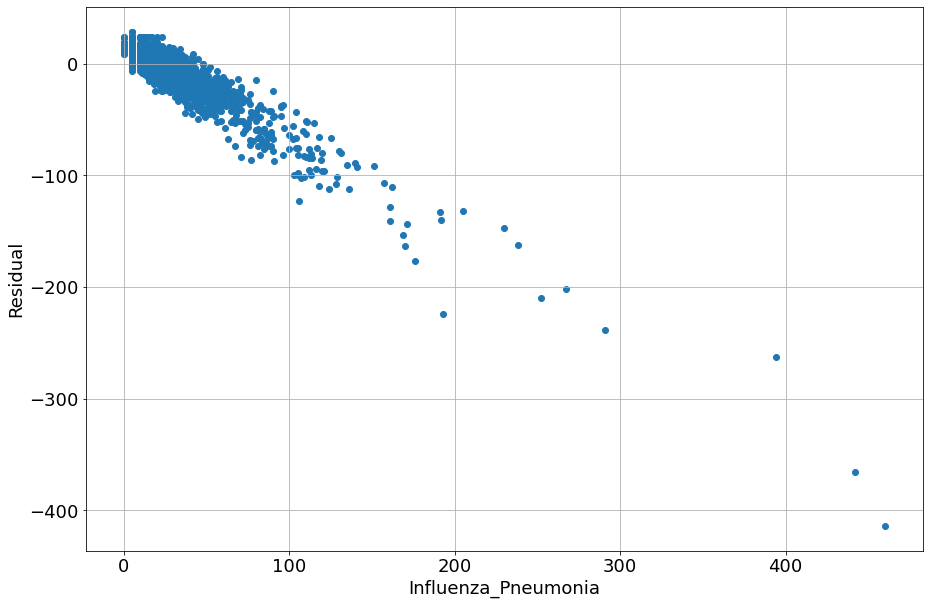

In [56]:
model = LinearRegression()
features = ['Week', 'Year', 'Fall', 'Winter', 'Spring', 'Summer']
hypertablerow = metrics(model=model, features=features, X_train=X_train, y_true_train=y_train, \
                        X_test=X_test, y_true_test=y_test, x_feature='Influenza_Pneumonia')

std_test 7.563781690093803
std_train 7.423144704885143
RMSE_test 7.572705104267073
RMSE_train 7.422809627145336
training_score 1.0
test_score 1.0


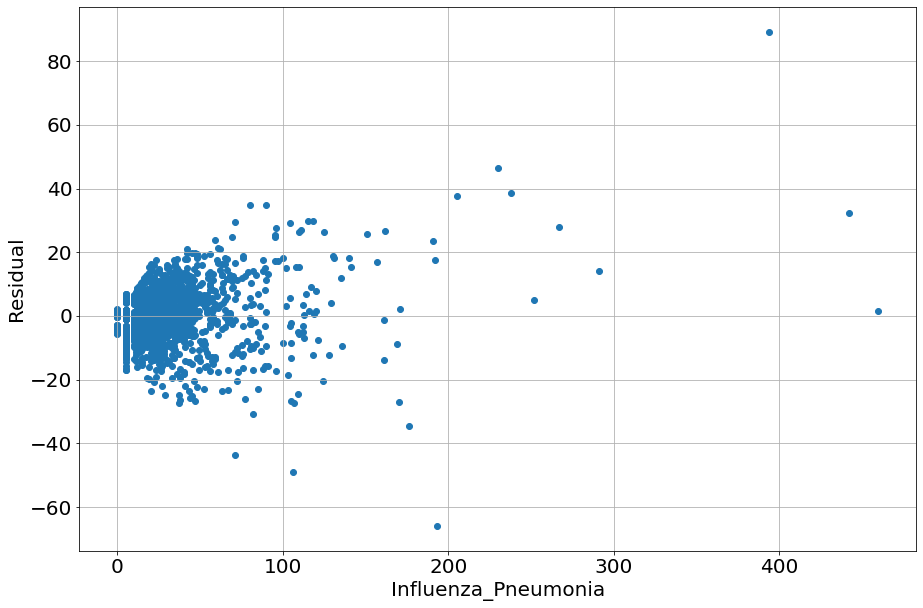

In [57]:
#model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,\
                        X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')



std_test 7.320982540882033
std_train 7.335158923602916
RMSE_test 7.324360765583916
RMSE_train 7.334827817505615
training_score 1.0
test_score 1.0


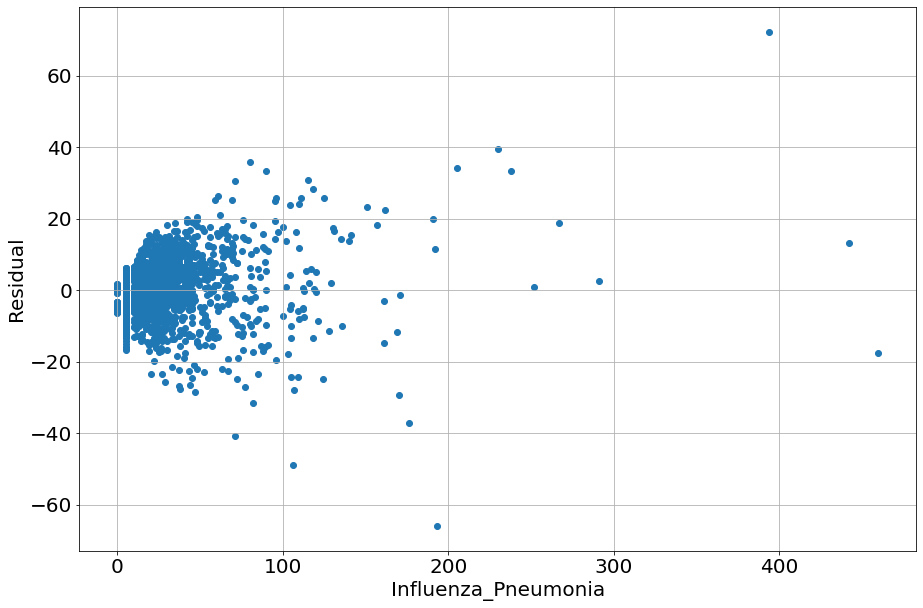

In [58]:
#model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

In [59]:
X_train['Influenza_Pneumonia_Squared'] = X_train['Influenza_Pneumonia']**2
X_test['Influenza_Pneumonia_Squared'] = X_test['Influenza_Pneumonia']**2

std_test 8.599740449534796
std_train 7.234708032869321
RMSE_test 8.608057117953608
RMSE_train 7.234381461084447
training_score 1.0
test_score 1.0


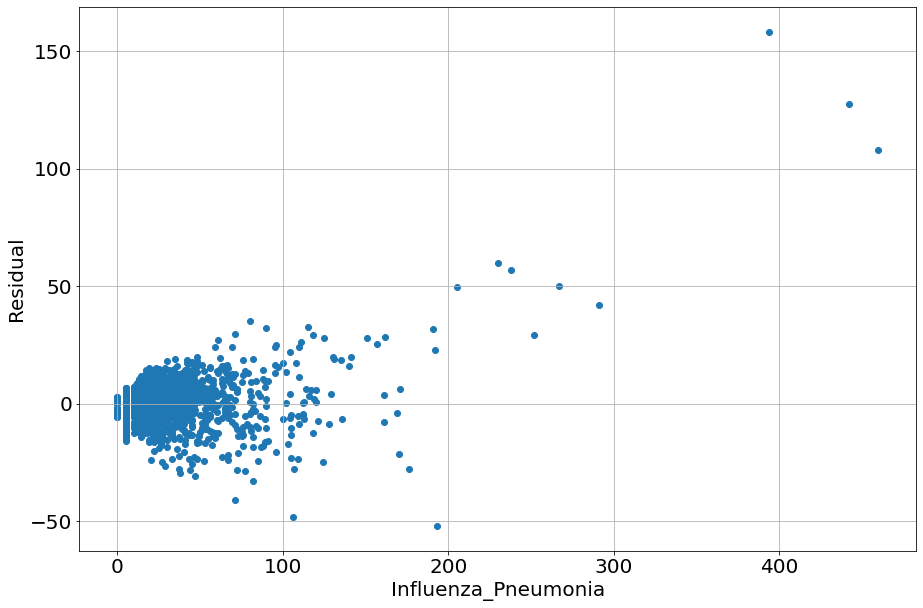

In [60]:
#model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Influenza_Pneumonia_Squared','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

In [61]:
X_train['Influenza_Pneumonia_SqRoot'] = X_train['Influenza_Pneumonia']**0.5
X_test['Influenza_Pneumonia_SqRoot'] = X_test['Influenza_Pneumonia']**0.5

std_test 7.475697155421642
std_train 7.239519944500215
RMSE_test 7.482359887357666
RMSE_train 7.23919315550758
training_score 1.0
test_score 1.0


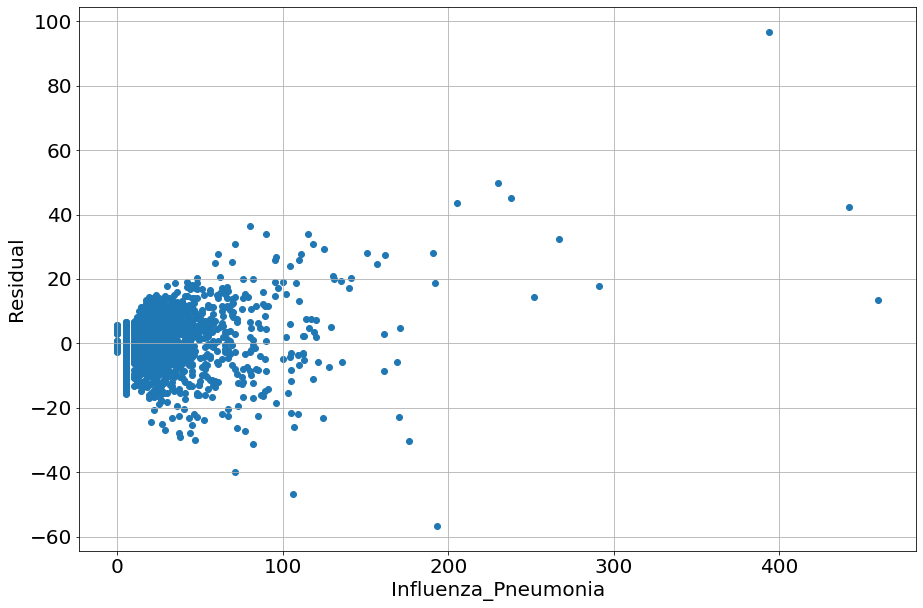

In [62]:
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Influenza_Pneumonia_SqRoot','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

std_test 7.056006208261551
std_train 7.066181274814884
RMSE_test 7.055709229092746
RMSE_train 7.065862310259468
training_score 1.0
test_score 1.0


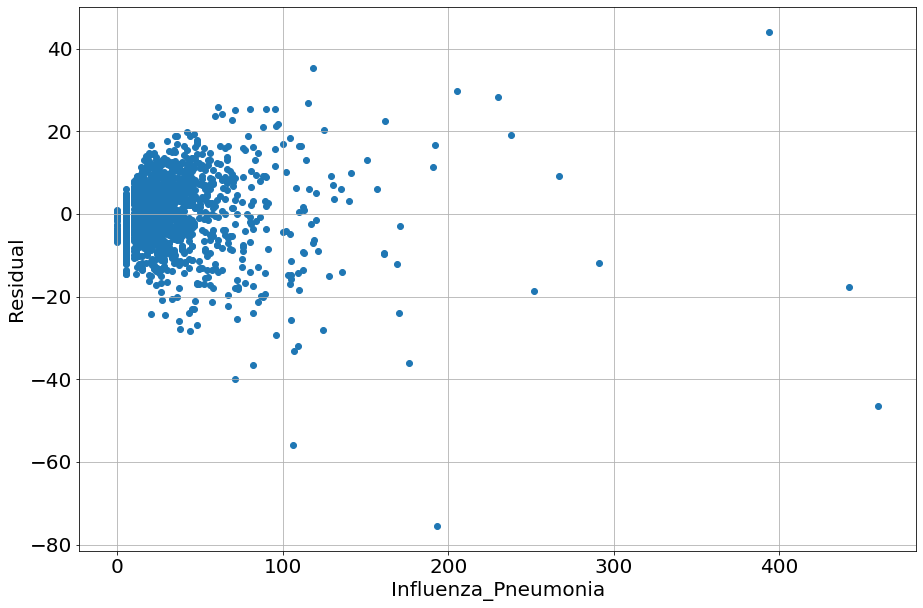

In [63]:
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory','Nat_Cause','Septicemia','Cancer','Diabetes','Alzheimer','COPD','Kidney','Other','Heart','Stroke']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

std_test 11.006375360757083
std_train 4.5643419046829035
RMSE_test 11.324426762950695
RMSE_train 4.707878913082936
training_score 1.0
test_score 1.0


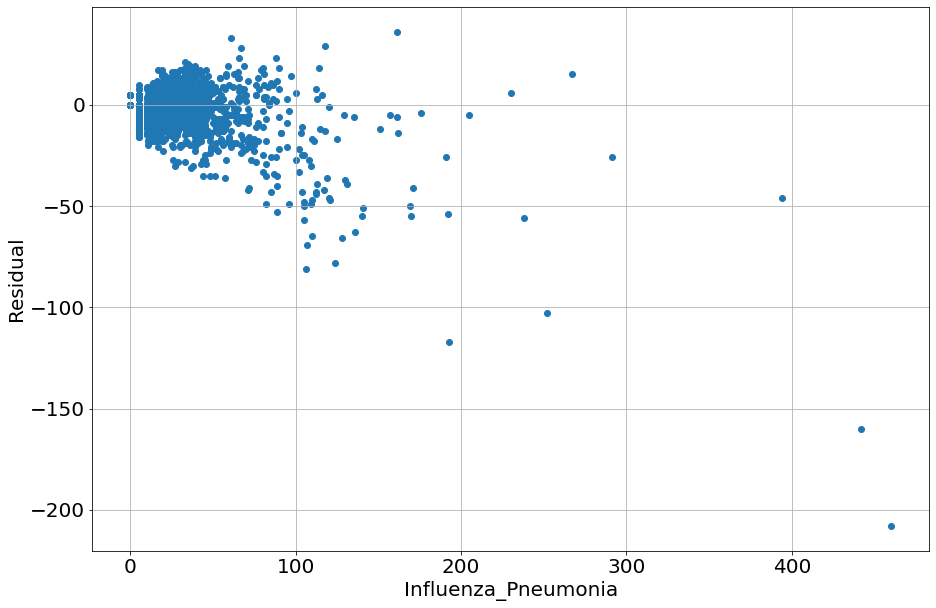

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth=10)
#features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

std_test 17.61412913676654
std_train 10.368057927425815
RMSE_test 18.520065609729336
RMSE_train 11.732606613959698
training_score 1.0
test_score 1.0


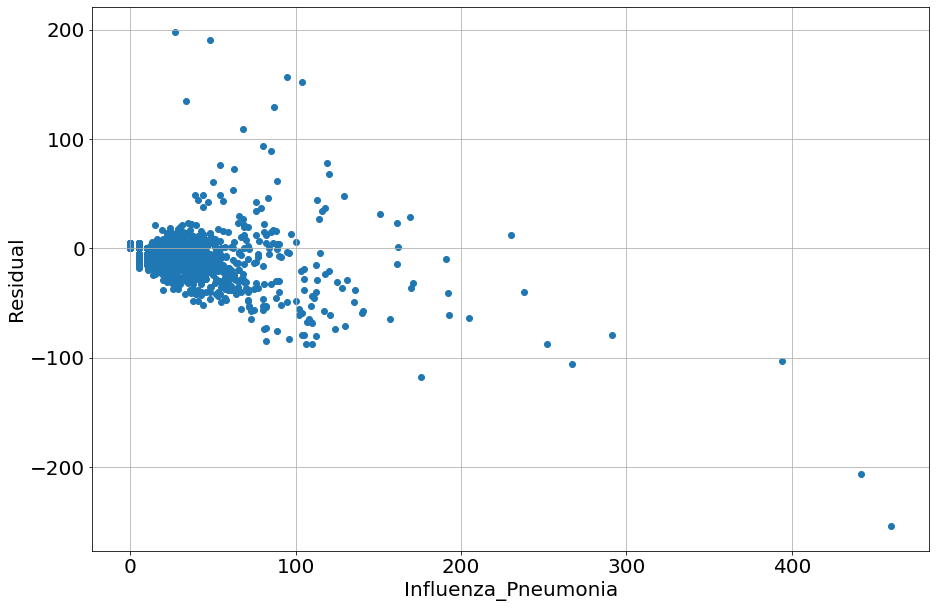

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
#features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

std_test 23.30119902910424
std_train 20.72942388818049
RMSE_test 26.03157009305113
RMSE_train 24.117082230689476
training_score 1.0
test_score 1.0


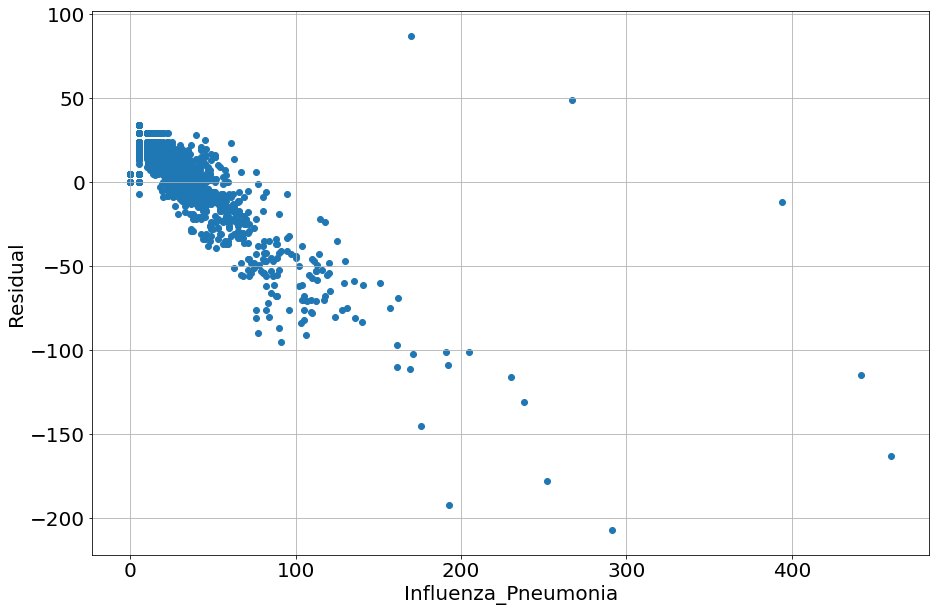

In [66]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
#features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory']
hypertablerow = metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
transformer = PolynomialFeatures(degree=2)
transformer
#polyreg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

#polyreg.fit(X=X_train,y=y_train)
#polyreg.fit?

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [68]:
numerical_features=['Week','Year','Influenza_Pneumonia','Respiratory','Nat_Cause','Septicemia','Cancer','Diabetes','Alzheimer','COPD','Kidney','Other','Heart','Stroke']

transformer.fit(X_train[numerical_features])

X_train_poly = transformer.transform(X_train[numerical_features])
                                

target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in \
                        [zip(numerical_features,p) for p in transformer.powers_]]

X_train_poly = pd.DataFrame(X_train_poly, columns=target_feature_names)
X_train_poly.head()

,,Week^1,Year^1,Influenza_Pneumonia^1,Respiratory^1,Nat_Cause^1,Septicemia^1,Cancer^1,Diabetes^1,Alzheimer^1,...,Kidney^2,Kidney^1xOther^1,Kidney^1xHeart^1,Kidney^1xStroke^1,Other^2,Other^1xHeart^1,Other^1xStroke^1,Heart^2,Heart^1xStroke^1,Stroke^2
0,1.0,1.0,2014.0,5.0,5.0,327.0,5.0,60.0,5.0,10.0,...,25.0,60.0,435.0,90.0,144.0,1044.0,216.0,7569.0,1566.0,324.0
1,1.0,2.0,2014.0,32.0,14.0,792.0,23.0,163.0,23.0,35.0,...,484.0,550.0,4378.0,880.0,625.0,4975.0,1000.0,39601.0,7960.0,1600.0
2,1.0,3.0,2014.0,33.0,19.0,971.0,21.0,209.0,34.0,31.0,...,576.0,456.0,5808.0,1440.0,361.0,4598.0,1140.0,58564.0,14520.0,3600.0
3,1.0,4.0,2014.0,42.0,16.0,967.0,25.0,205.0,23.0,25.0,...,484.0,770.0,5478.0,1166.0,1225.0,8715.0,1855.0,62001.0,13197.0,2809.0
4,1.0,5.0,2014.0,26.0,15.0,953.0,18.0,200.0,26.0,38.0,...,324.0,432.0,4842.0,900.0,576.0,6456.0,1200.0,72361.0,13450.0,2500.0


In [69]:
X_test_poly = transformer.transform(X_test[numerical_features])
X_test_poly = pd.DataFrame(X_test_poly, columns=target_feature_names)
X_test_poly.head()

,,Week^1,Year^1,Influenza_Pneumonia^1,Respiratory^1,Nat_Cause^1,Septicemia^1,Cancer^1,Diabetes^1,Alzheimer^1,...,Kidney^2,Kidney^1xOther^1,Kidney^1xHeart^1,Kidney^1xStroke^1,Other^2,Other^1xHeart^1,Other^1xStroke^1,Heart^2,Heart^1xStroke^1,Stroke^2
0,1.0,1.0,2018.0,44.0,18.0,1159.0,31.0,212.0,34.0,66.0,...,361.0,570.0,6080.0,1121.0,900.0,9600.0,1770.0,102400.0,18880.0,3481.0
1,1.0,2.0,2018.0,68.0,26.0,1215.0,20.0,206.0,28.0,64.0,...,529.0,828.0,7613.0,1748.0,1296.0,11916.0,2736.0,109561.0,25156.0,5776.0
2,1.0,3.0,2018.0,67.0,21.0,1190.0,29.0,210.0,25.0,61.0,...,441.0,630.0,7287.0,1218.0,900.0,10410.0,1740.0,120409.0,20126.0,3364.0
3,1.0,4.0,2018.0,64.0,25.0,1208.0,37.0,215.0,34.0,83.0,...,784.0,588.0,8064.0,2268.0,441.0,6048.0,1701.0,82944.0,23328.0,6561.0
4,1.0,5.0,2018.0,58.0,16.0,1058.0,23.0,219.0,22.0,52.0,...,289.0,340.0,4692.0,1122.0,400.0,5520.0,1320.0,76176.0,18216.0,4356.0


std_test 10.864021179441705
std_train 6.379879077716425
RMSE_test 10.997754394680864
RMSE_train 6.3795910925637065
training_score 1.0
test_score 1.0


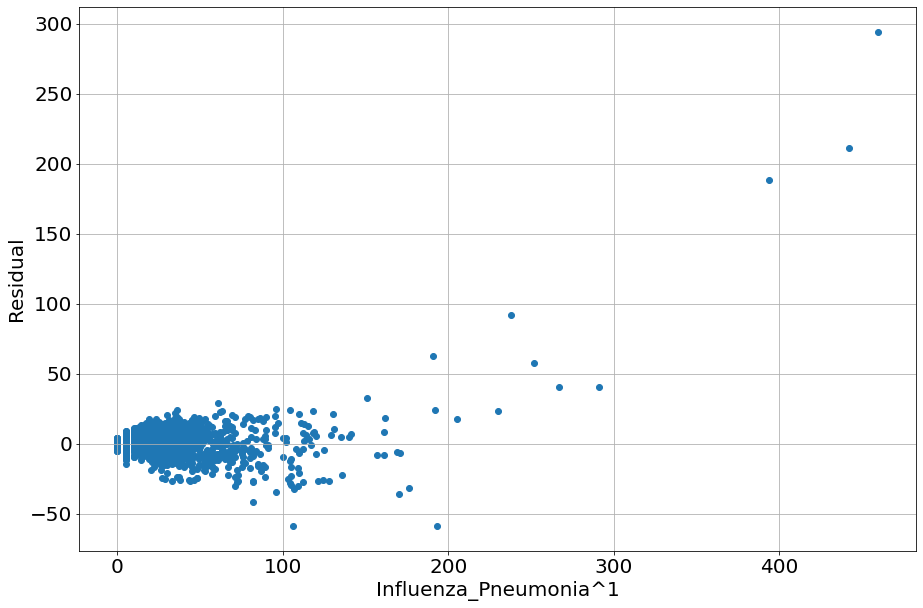

In [70]:
model = LinearRegression()
features=target_feature_names
#features
hypertablerow = metrics(model=model,features=features,X_train=X_train_poly,y_true_train=y_train,X_test=X_test_poly,y_true_test=y_test, x_feature='Influenza_Pneumonia^1')

In [71]:
y_train

0        32.0
1        33.0
2        42.0
3        26.0
4        31.0
         ... 
13724     5.0
13725     5.0
13726     5.0
13727     0.0
13728     5.0
Name: NextWeekInfluenzaPneumonia, Length: 11077, dtype: float64

In [72]:
pd.DataFrame(hypertable).to_csv('hypertable.csv')
#add test set score

In [73]:
dfhypertable=pd.DataFrame(hypertable).sort_values('RMSE_test')

In [74]:
pd.set_option('display.max_colwidth', -1)
dfhypertable.sort_values('RMSE_test')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,model,features,dropped isna columns,std_test,std_train,RMSE_test,RMSE_train,training_score,test_score
5,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Respiratory, Nat_Cause, Septicemia, Cancer, Diabetes, Alzheimer, COPD, Kidney, Other, Heart, Stroke]",True,7.056006,7.066181,7.055709,7.065862,1.0,1.0
2,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Respiratory]",True,7.320983,7.335159,7.324361,7.334828,1.0,1.0
4,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Influenza_Pneumonia_SqRoot, Respiratory]",True,7.475697,7.239520,7.482360,7.239193,1.0,1.0
1,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia]",True,7.563782,7.423145,7.572705,7.422810,1.0,1.0
3,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Influenza_Pneumonia_Squared, Respiratory]",True,8.599740,7.234708,8.608057,7.234381,1.0,1.0
9,LinearRegression,"[, Week^1, Year^1, Influenza_Pneumonia^1, Respiratory^1, Nat_Cause^1, Septicemia^1, Cancer^1, Diabetes^1, Alzheimer^1, COPD^1, Kidney^1, Other^1, Heart^1, Stroke^1, Week^2, Week^1xYear^1, Week^1xInfluenza_Pneumonia^1, Week^1xRespiratory^1, Week^1xNat_Cause^1, Week^1xSepticemia^1, Week^1xCancer^1, Week^1xDiabetes^1, Week^1xAlzheimer^1, Week^1xCOPD^1, Week^1xKidney^1, Week^1xOther^1, Week^1xHeart^1, Week^1xStroke^1, Year^2, Year^1xInfluenza_Pneumonia^1, Year^1xRespiratory^1, Year^1xNat_Cause^1, Year^1xSepticemia^1, Year^1xCancer^1, Year^1xDiabetes^1, Year^1xAlzheimer^1, Year^1xCOPD^1, Year^1xKidney^1, Year^1xOther^1, Year^1xHeart^1, Year^1xStroke^1, Influenza_Pneumonia^2, Influenza_Pneumonia^1xRespiratory^1, Influenza_Pneumonia^1xNat_Cause^1, Influenza_Pneumonia^1xSepticemia^1, Influenza_Pneumonia^1xCancer^1, Influenza_Pneumonia^1xDiabetes^1, Influenza_Pneumonia^1xAlzheimer^1, Influenza_Pneumonia^1xCOPD^1, Influenza_Pneumonia^1xKidney^1, Influenza_Pneumonia^1xOther^1, Influenza_Pneumonia^1xHeart^1, Influenza_Pneumonia^1xStroke^1, Respiratory^2, Respiratory^1xNat_Cause^1, Respiratory^1xSepticemia^1, Respiratory^1xCancer^1, Respiratory^1xDiabetes^1, Respiratory^1xAlzheimer^1, Respiratory^1xCOPD^1, Respiratory^1xKidney^1, Respiratory^1xOther^1, Respiratory^1xHeart^1, Respiratory^1xStroke^1, Nat_Cause^2, Nat_Cause^1xSepticemia^1, Nat_Cause^1xCancer^1, Nat_Cause^1xDiabetes^1, Nat_Cause^1xAlzheimer^1, Nat_Cause^1xCOPD^1, Nat_Cause^1xKidney^1, Nat_Cause^1xOther^1, Nat_Cause^1xHeart^1, Nat_Cause^1xStroke^1, Septicemia^2, Septicemia^1xCancer^1, Septicemia^1xDiabetes^1, Septicemia^1xAlzheimer^1, Septicemia^1xCOPD^1, Septicemia^1xKidney^1, Septicemia^1xOther^1, Septicemia^1xHeart^1, Septicemia^1xStroke^1, Cancer^2, Cancer^1xDiabetes^1, Cancer^1xAlzheimer^1, Cancer^1xCOPD^1, Cancer^1xKidney^1, Cancer^1xOther^1, Cancer^1xHeart^1, Cancer^1xStroke^1, Diabetes^2, Diabetes^1xAlzheimer^1, Diabetes^1xCOPD^1, Diabetes^1xKidney^1, Diabetes^1xOther^1, Diabetes^1xHeart^1, Diabetes^1xStroke^1, Alzheimer^2, ...]",True,10.864021,6.379879,10.997754,6.379591,1.0,1.0
6,RandomForestClassifier,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Respiratory, Nat_Cause, Septicemia, Cancer, Diabetes, Alzheimer, COPD, Kidney, Other, Heart, Stroke]",True,11.006375,4.564342,11.324427,4.707879,1.0,1.0
7,LogisticRegression,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Respiratory, Nat_Cause, Septicemia, Cancer, Diabetes, Alzheimer, COPD, Kidney, Other, Heart, Stroke]",True,17.614129,10.368058,18.520066,11.732607,1.0,1.0
8,SGDClassifier,"[Week, Year, Fall, Winter, Spring, Summer, Influenza_Pneumonia, Respiratory, Nat_Cause, Septicemia, Cancer, Diabetes, Alzheimer, COPD, Kidney, Other, Heart, Stroke]",True,23.301199,20.729424,26.031570,24.117082,1.0,1.0
0,LinearRegression,"[Week, Year, Fall, Winter, Spring, Summer]",True,26.957521,22.609005,27.022356,22.607985,1.0,1.0


In [75]:
def metrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None, \
            x_feature=None, x_label=''):
    
    X_train_temp = X_train[features]
    X_test_temp = X_test[features]    
    model.fit(X_train_temp,y_train)
    
    y_pred_test = model.predict(X_test_temp)
    y_pred_train = model.predict(X_train_temp)

    plt.figure(figsize=(15,10))
    plt.scatter(X_test[x_feature], y_pred_test-y_test)
    fig.tight_layout()
    plt.grid('on')
    plt.xlabel(x_feature)
    plt.ylabel('Residual')
    plt.rc('font', size=20)
    plt.show()
    
    fig2, ax = plt.subplots(figsize=(15,10))
    plt.axes
    plt.title('Influenza and Pneumonia')

    ysmoothed = gaussian_filter1d(y_test, sigma=2)
    ax.plot(ysmoothed,label='actual')
    ysmoothed = gaussian_filter1d(y_pred_test, sigma=2)
    ax.plot(ysmoothed,label='predicted')
    
    fig2.tight_layout()
    plt.grid('on')
    plt.legend()
    plt.xlabel('Weeks')
    plt.ylabel('Number of deaths')
    plt.rc('font', size=18)
    plt.show()

    
    #return hypertablerow
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


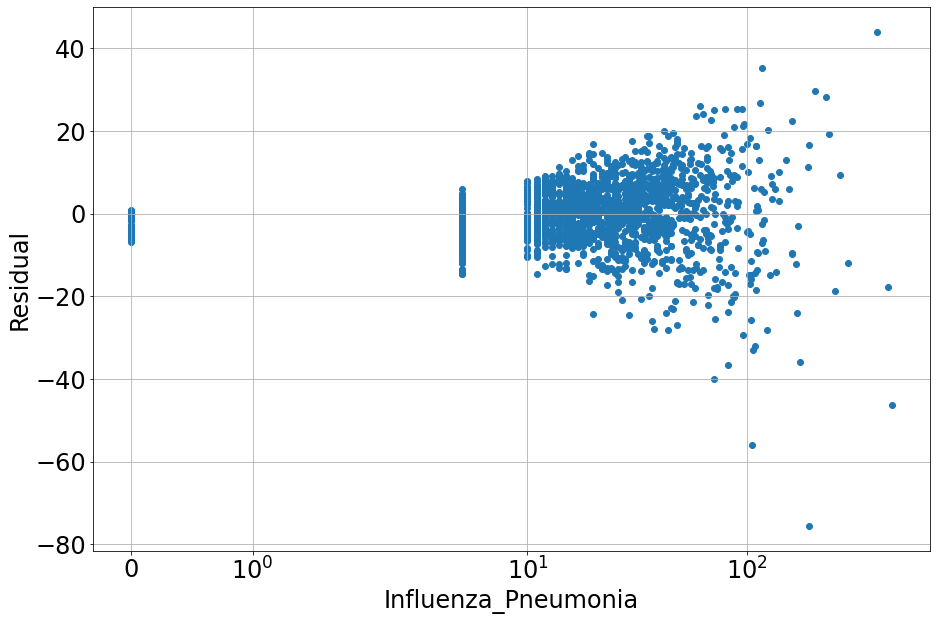

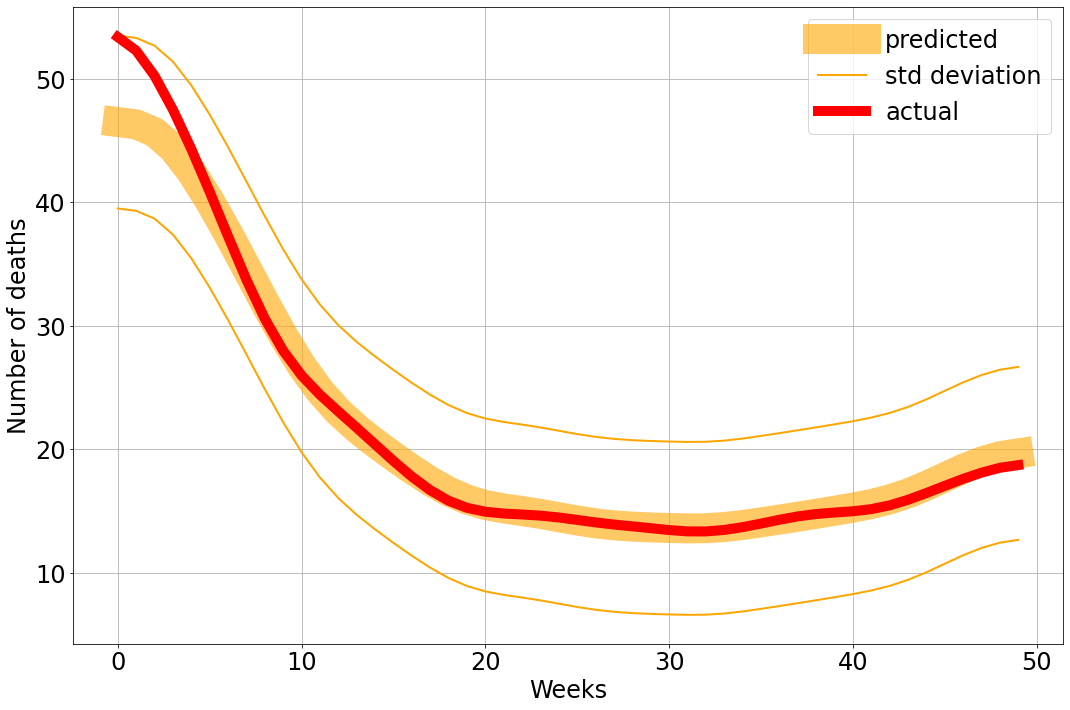

In [78]:
#Repeat the best model
model = LinearRegression()
features=['Week','Year','Fall','Winter','Spring','Summer','Influenza_Pneumonia','Respiratory','Nat_Cause',
          'Septicemia','Cancer','Diabetes','Alzheimer','COPD','Kidney','Other','Heart','Stroke']
#metrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test, x_feature='Influenza_Pneumonia')

x_feature='Influenza_Pneumonia'
X_train_temp = X_train[features]
X_test_temp = X_test[features]    
model.fit(X_train_temp,y_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)


X_test_temp['predicted'] = y_pred_test
X_test_temp['actual'] = y_test


plt.figure(figsize=(15,10))
plt.scatter(X_test[x_feature], y_pred_test-y_test)
fig.tight_layout()
plt.xscale('symlog')
plt.grid('on')
plt.xlabel(x_feature)
plt.ylabel('Residual')
plt.rc('font', size=24)
plt.show()
    
fig2, ax = plt.subplots(figsize=(15,10))
plt.axes
#plt.title('Average number of deaths per week from Influenza and Pneumonia')

ysmoothed = gaussian_filter1d(X_test_temp.groupby(['Week'])['predicted'].mean(), sigma=2)
ax.plot(ysmoothed,label='predicted', linewidth=30, color = 'orange', alpha=0.6)
ax.plot(ysmoothed+7, label='std deviation', linewidth=2, color = 'orange', alpha=1)
ax.plot(ysmoothed-7, linewidth=2, color = 'orange', alpha=1)
ysmoothed = gaussian_filter1d(X_test_temp.groupby(['Week'])['actual'].mean(), sigma=2)
ax.plot(ysmoothed,label='actual', linewidth=10, color='red')
    
fig2.tight_layout()
plt.grid('on')
plt.legend(fontsize=24)
plt.xlabel('Weeks')
plt.ylabel('Number of deaths')
plt.rc('font', size=24)
plt.show()


#pd.DataFrame(y_pred_test)